# Fifa Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud 
sns.set(style = "ticks")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # defining the colour palette
flatui = sns.color_palette(flatui)

C:\Users\tejas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
fifa1 = pd.read_csv('data/FIFA/FIFA_data.csv')
fifa1.head()
fifa = fifa1.copy()

In [3]:
fifa.shape

(18207, 89)

In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## HeatMap

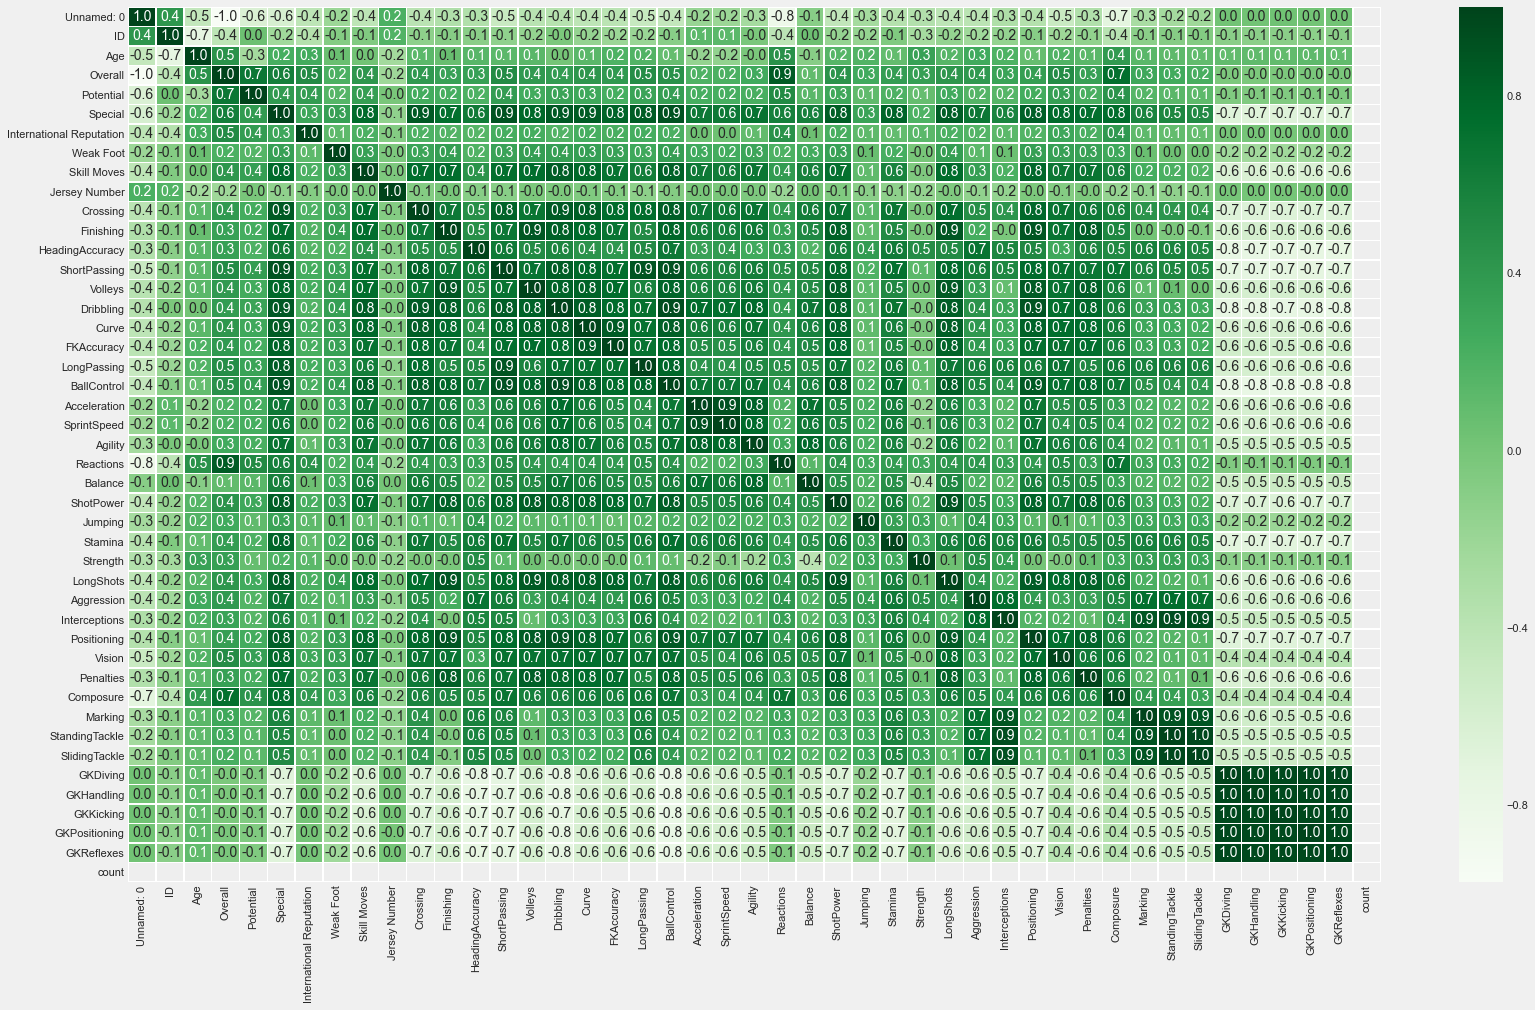

In [50]:
plt.figure(figsize = (25,15))
sns.heatmap(fifa1.corr(),linewidth = 0.5,fmt = '.1f',annot = True,cmap = 'Greens')
plt.show()

## WordCloud

(-0.5, 1919.5, 1079.5, -0.5)

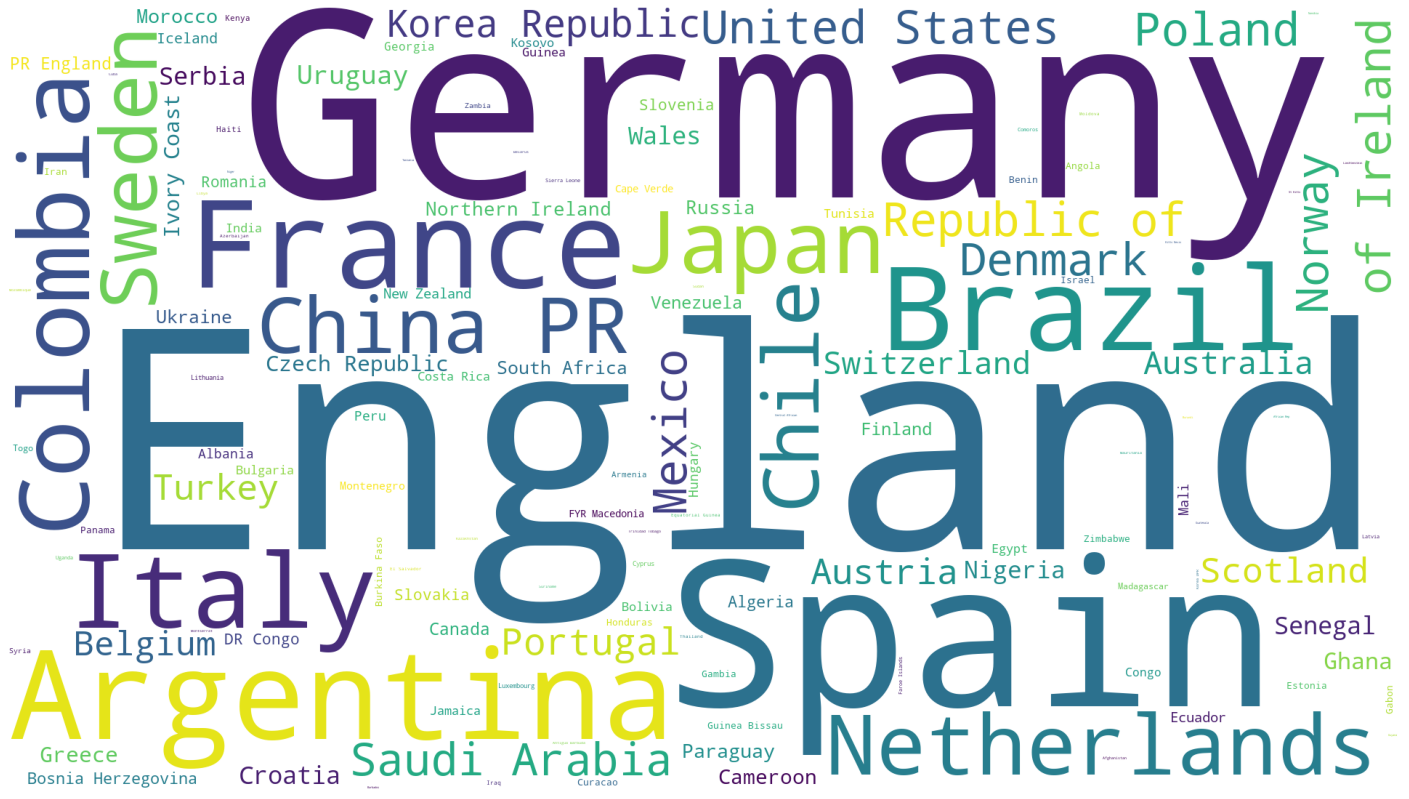

In [7]:
plt.figure(figsize = (25,15))
wordcloud = WordCloud(height = 1080,width = 1920,background_color = 'white').generate(" ".join(fifa.Nationality))
plt.imshow(wordcloud)
plt.axis('off')

In [8]:
impute_mean = fifa.loc[:,['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

impute_median = fifa.loc[:,['Weak Foot',
       'Skill Moves']]

impute_mode = fifa.loc[:,['Preferred Foot','International Reputation', 'Body Type','Height','Weight']]

In [9]:
inplace = True
fifa['Club'].fillna('No Club', inplace = inplace)
fifa['Position'].fillna('ST', inplace = inplace)
for i in impute_mean.columns:
    fifa[i].fillna(fifa[i].mean(), inplace = inplace)
for i in impute_median.columns:
    fifa[i].fillna(fifa[i].median(), inplace = inplace)
for i in impute_mode.columns:
    fifa[i].fillna(fifa[i].mode()[0], inplace = inplace)

In [10]:
fifa.columns[fifa.isna().any()]

Index(['Work Rate', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

## Combining columns

* Since there are many columns in the dataset we are combining the attributes to end up with 6 major columns.

In [11]:
goalkeeping = ['GKDiving', 'GKHandling','GKKicking','GKPositioning', 'GKReflexes']

defend = ['Marking','Reactions','StandingTackle', 'SlidingTackle','Interceptions']

attack = ['FKAccuracy','Finishing', 'HeadingAccuracy','ShotPower','LongShots','Penalties','Dribbling','Curve']

midfield = ['Crossing', 'ShortPassing', 'Volleys', 'Dribbling','Curve','LongPassing', 'BallControl']

physicalattributes = ['Acceleration','SprintSpeed','Agility','Balance','Jumping', 'Stamina', 'Strength','Positioning']

mental = ['Positioning', 'Vision','Composure','Aggression']

In [12]:
def keeping(fifa):
    return int(round((fifa[goalkeeping].mean()).mean()))

def defending(fifa):
    return int(round((fifa[defend].mean()).mean()))

def attacking(fifa):
    return int(round((fifa[attack].mean()).mean()))

def midfielding(fifa):
    return int(round((fifa[midfield].mean()).mean()))

def mentalattributes(fifa):
    return int(round((fifa[mental].mean()).mean()))

def physical(fifa):
    return int(round((fifa[physicalattributes].mean()).mean()))

In [13]:
fifa['keeping'] = fifa.apply(keeping, axis = 1)
fifa['defending'] = fifa.apply(defending, axis = 1)
fifa['attacking'] = fifa.apply(attacking, axis = 1)
fifa['midfield'] = fifa.apply(midfielding, axis = 1)
fifa['mental'] = fifa.apply(mentalattributes, axis = 1)
fifa['physical'] = fifa.apply(physical, axis = 1)

In [14]:
fifa.drop(attack+defend+goalkeeping+midfield+physicalattributes+mental, axis = 1,inplace = True)
fifa.drop('Unnamed: 0',axis = 1, inplace = True)

## Creating the players dataset

In [15]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause',
       'keeping', 'defending', 'attacking', 'midfield', 'mental', 'physical'],
      dtype='object')

In [16]:
players = fifa[['Name','Age','keeping', 'defending', 'attacking', 'midfield', 'mental', 'physical','Overall','Potential','Nationality','Club', 'Value', 'Wage']]

In [17]:
players

,Name,Age,keeping,defending,attacking,midfield,mental,physical,Overall,Potential,Nationality,Club,Value,Wage
0,L. Messi,31,11,41,88,90,83,82,94,94,Argentina,FC Barcelona,€110.5M,€565K
1,Cristiano Ronaldo,33,12,41,88,85,84,87,94,94,Portugal,Juventus,€77M,€405K
2,Neymar Jr,26,12,43,83,86,82,80,92,93,Brazil,Paris Saint-Germain,€118.5M,€290K
3,De Gea,27,89,34,22,30,46,50,91,93,Spain,Manchester United,€72M,€260K
4,K. De Bruyne,27,11,66,82,89,86,78,91,92,Belgium,Manchester City,€102M,€355K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,9,46,38,38,46,54,47,65,England,Crewe Alexandra,€60K,€1K
18203,N. Christoffersson,19,9,22,40,34,42,47,47,63,Sweden,Trelleborgs FF,€60K,€1K
18204,B. Worman,16,8,24,43,37,41,55,47,67,England,Cambridge United,€60K,€1K
18205,D. Walker-Rice,17,10,23,44,42,42,52,47,66,England,Tranmere Rovers,€60K,€1K


## Looking at count of players based on position

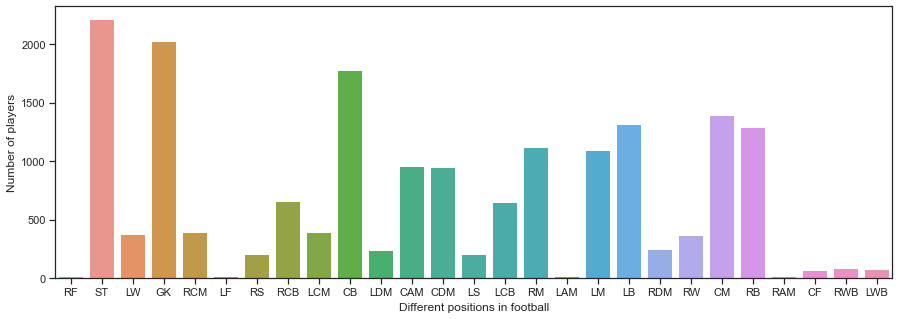

In [18]:
plt.figure(figsize = (15,5))
sns.countplot('Position', data = fifa)
plt.xlabel('Different positions in football')
plt.ylabel('Number of players')
plt.show()

## Looking at count of players based on height

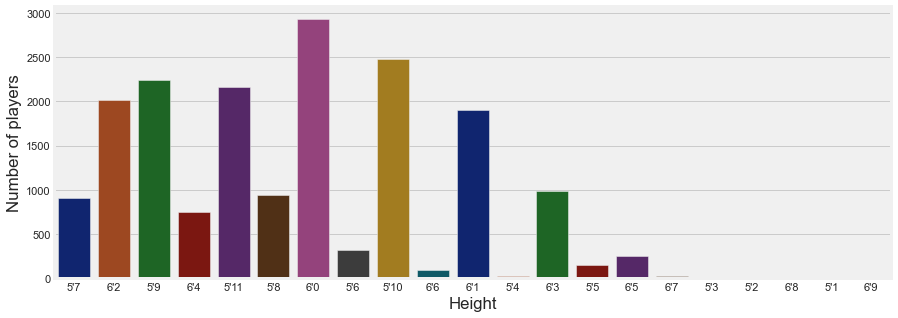

In [19]:
plt.figure(figsize = (15,5))
plt.style.use('fivethirtyeight')
sns.countplot('Height', data = fifa, palette = 'dark')
plt.xlabel('Height')
plt.ylabel('Number of players')
plt.show()

## Count of players based on weight

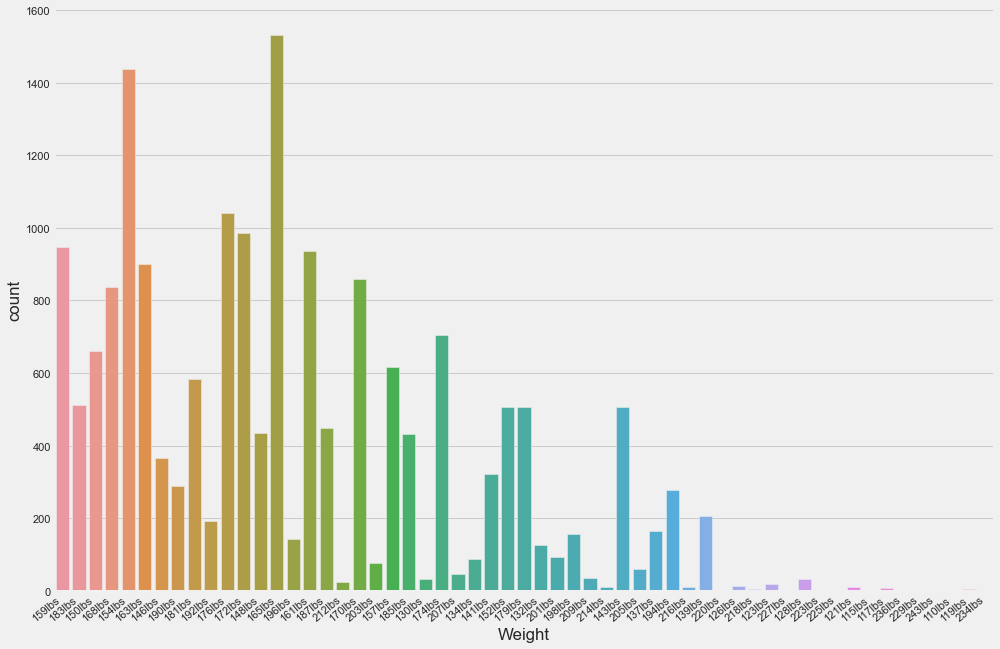

In [20]:
plt.figure(figsize = (15,10))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Weight', data = fifa)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.show()

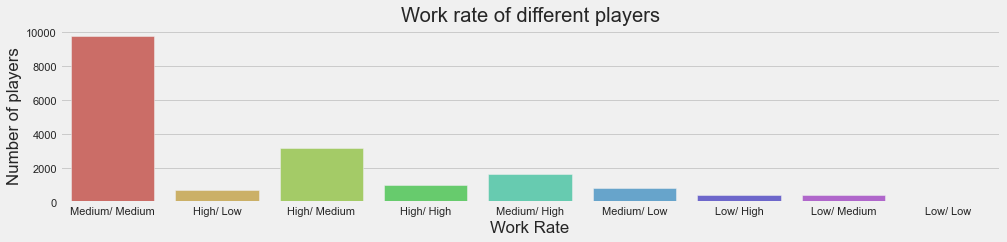

In [21]:
plt.figure(figsize = (15,3))

sns.countplot('Work Rate', data = fifa, palette = 'hls')
plt.title('Work rate of different players')
plt.ylabel('Number of players')
plt.show()

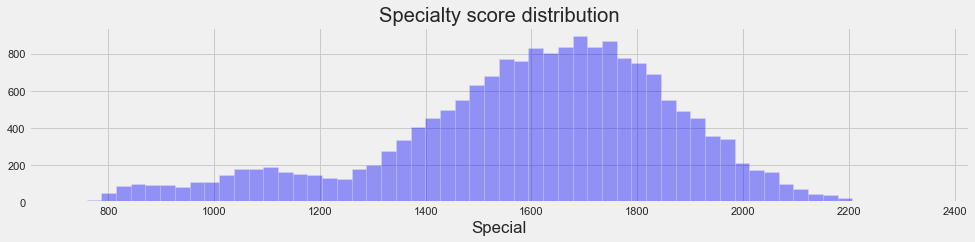

In [22]:
plt.figure(figsize = (15,3))
x = fifa.Special
sns.distplot(fifa['Special'], bins = 58, color = 'blue', kde = False)
plt.title('Specialty score distribution')
plt.ylabel
plt.show()


In [23]:
overallt = players.groupby('Nationality').sum().sort_values(by = 'Overall', ascending = False).head(20)[['Overall','Potential']]

<Figure size 1080x288 with 0 Axes>

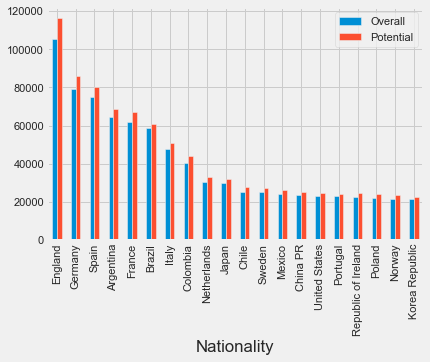

In [24]:
plt.figure(figsize = (15,4))
overallt.plot(kind = 'bar')
plt.show()

In [26]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia') # defining a tuple consisting of country names
countries_data = players.isin(some_countries)
some_data = players.loc[players['Nationality'].isin(some_countries) & players['Overall']]

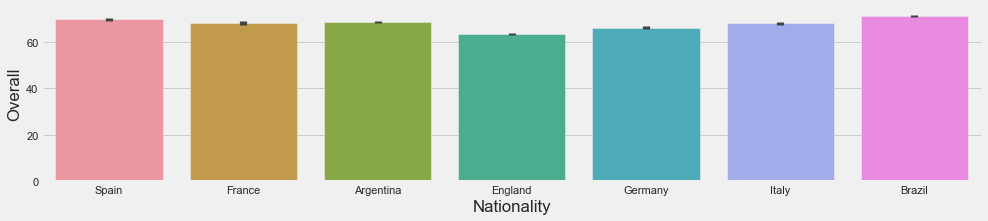

In [27]:
plt.figure(figsize = (15,3))
sns.barplot(x = some_data['Nationality'], y = some_data['Overall'],data = some_data)

In [28]:
players['Club'].value_counts().head(10)

No Club              241
AS Monaco             33
Chelsea               33
Arsenal               33
Atlético Madrid       33
Tottenham Hotspur     33
RC Celta              33
CD Leganés            33
Everton               33
Newcastle United      33
Name: Club, dtype: int64

In [29]:
some_clubs = ('FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'FC Barcelona', 'Real Madrid', 'Atlético Madrid')

In [30]:
data_clubs = players.loc[players['Club'].isin(some_clubs) & players['Overall'] ]
data_clubs.head(5)

,Name,Age,keeping,defending,attacking,midfield,mental,physical,Overall,Potential,Nationality,Club,Value,Wage
3,De Gea,27,89,34,22,30,46,50,91,93,Spain,Manchester United,€72M,€260K
4,K. De Bruyne,27,11,66,82,89,86,78,91,92,Belgium,Manchester City,€102M,€355K
5,E. Hazard,27,9,43,81,86,80,83,91,91,Belgium,Chelsea,€93M,€340K
6,L. Modrić,32,10,76,78,87,79,79,91,91,Croatia,Real Madrid,€67M,€420K
7,L. Suárez,31,31,56,85,82,87,82,91,91,Uruguay,FC Barcelona,€80M,€455K


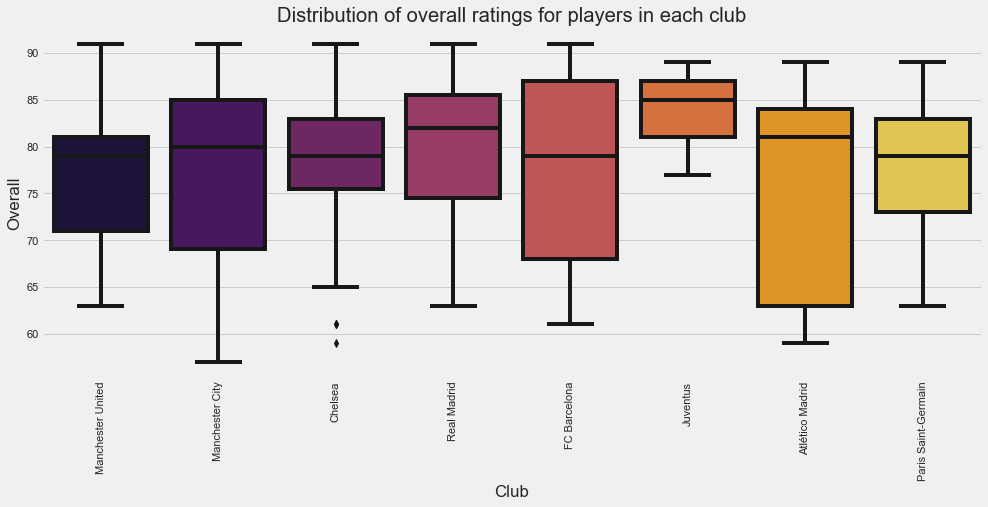

In [31]:
plt.rcParams['figure.figsize'] = (15, 6)
o = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'],palette = 'inferno')
plt.xticks(rotation = 90)
plt.title('Distribution of overall ratings for players in each club')
plt.show()


In [32]:
left_foot = fifa[fifa['Preferred Foot'] == 'Left'][['Name','Age','Club','Nationality']]
left_foot

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
...,...,...,...,...
18172,C. Hawkins,18,Burton Albion,England
18175,E. Clarke,19,Fleetwood Town,England
18191,J. Norville-Williams,18,Cambridge United,England
18200,J. Young,18,Swindon Town,Scotland


In [33]:
right_foot = fifa[fifa['Preferred Foot'] == 'Right'][['Name','Age','Club','Nationality']]
right_foot

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
...,...,...,...,...
18202,J. Lundstram,19,Crewe Alexandra,England
18203,N. Christoffersson,19,Trelleborgs FF,Sweden
18204,B. Worman,16,Cambridge United,England
18205,D. Walker-Rice,17,Tranmere Rovers,England


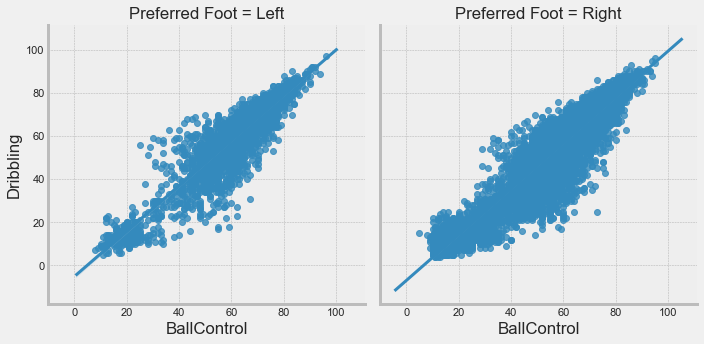

In [34]:
plt.style.use('bmh')
sns.lmplot(x = 'BallControl',y = 'Dribbling', data = fifa1, col = 'Preferred Foot')
plt.show()

In [35]:
print("Maximum Overall: {}".format(players.loc[players['Overall'].idxmax][0]))
print("Maximum Potential: {}".format(players.loc[players['Potential'].idxmax][0]))

Maximum Overall: L. Messi
Maximum Potential: K. Mbappé


In [36]:
col = ['Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']
j = 0
best_player_list = []
for i in col:
    best_player_list.append(fifa1['Name'][fifa1[i].idxmax()])
    print("Best {}: {}".format(col[j],fifa1['Name'][fifa1[i].idxmax()]))
    j+=1

Best Crossing: K. De Bruyne
Best Finishing: L. Messi
Best HeadingAccuracy: Naldo
Best ShortPassing: L. Modrić
Best Volleys: E. Cavani
Best Dribbling: L. Messi
Best Curve: Quaresma
Best FKAccuracy: L. Messi
Best LongPassing: T. Kroos
Best BallControl: L. Messi
Best Acceleration: Douglas Costa
Best SprintSpeed: K. Mbappé
Best Agility: Neymar Jr
Best Reactions: Cristiano Ronaldo
Best Balance: Bernard
Best ShotPower: Cristiano Ronaldo
Best Jumping: Cristiano Ronaldo
Best Stamina: N. Kanté
Best Strength: A. Akinfenwa
Best LongShots: L. Messi
Best Aggression: B. Pearson
Best Interceptions: N. Kanté
Best Positioning: Cristiano Ronaldo
Best Vision: L. Messi
Best Penalties: M. Balotelli
Best Composure: L. Messi
Best Marking: A. Barzagli
Best StandingTackle: G. Chiellini
Best SlidingTackle: Sergio Ramos
Best GKDiving: De Gea
Best GKHandling: J. Oblak
Best GKKicking: M. Neuer
Best GKPositioning: G. Buffon
Best GKReflexes: De Gea


In [37]:
best_player_list

['K. De Bruyne',
 'L. Messi',
 'Naldo',
 'L. Modrić',
 'E. Cavani',
 'L. Messi',
 'Quaresma',
 'L. Messi',
 'T. Kroos',
 'L. Messi',
 'Douglas Costa',
 'K. Mbappé',
 'Neymar Jr',
 'Cristiano Ronaldo',
 'Bernard',
 'Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'N. Kanté',
 'A. Akinfenwa',
 'L. Messi',
 'B. Pearson',
 'N. Kanté',
 'Cristiano Ronaldo',
 'L. Messi',
 'M. Balotelli',
 'L. Messi',
 'A. Barzagli',
 'G. Chiellini',
 'Sergio Ramos',
 'De Gea',
 'J. Oblak',
 'M. Neuer',
 'G. Buffon',
 'De Gea']

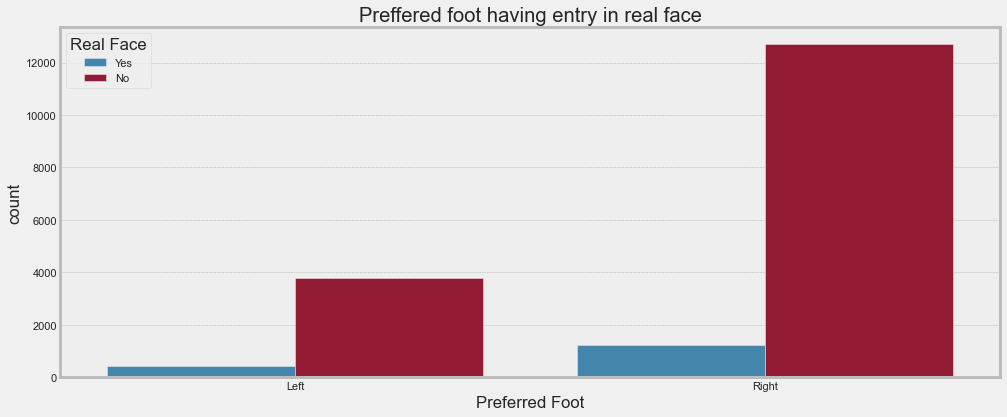

In [38]:
sns.countplot(x = 'Preferred Foot', hue = 'Real Face', data = fifa1)
plt.title('Preffered foot having entry in real face')
plt.show()

In [39]:
best_foot = fifa[[fifa['Name'].isin(best_player_list)][0] == True][['Name','Preferred Foot']]

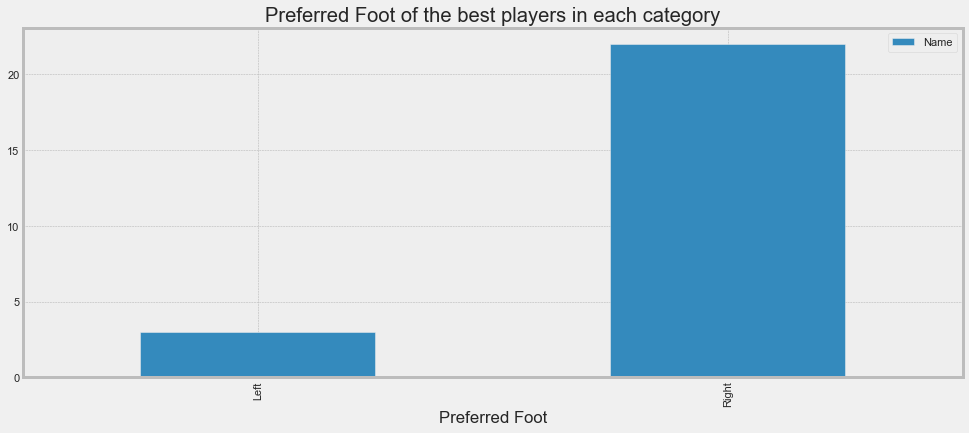

In [40]:
best_foot.groupby('Preferred Foot').count().plot(kind = 'bar')
plt.title('Preferred Foot of the best players in each category')
plt.show()

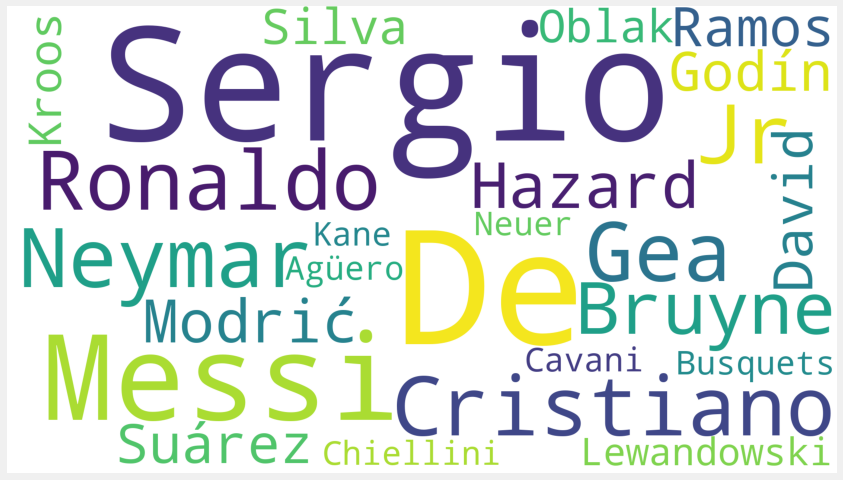

In [45]:
#Top 20 overall players 
plt.figure(figsize = (15,8))
plt.axis('off')
players_wordcloud = WordCloud(height = 1080, width = 1920, background_color = 'white').generate(" ".join(fifa1.sort_values(by = 'Overall', ascending = False)['Name'][0:20]))
plt.imshow(players_wordcloud)
plt.title('')
plt.show()


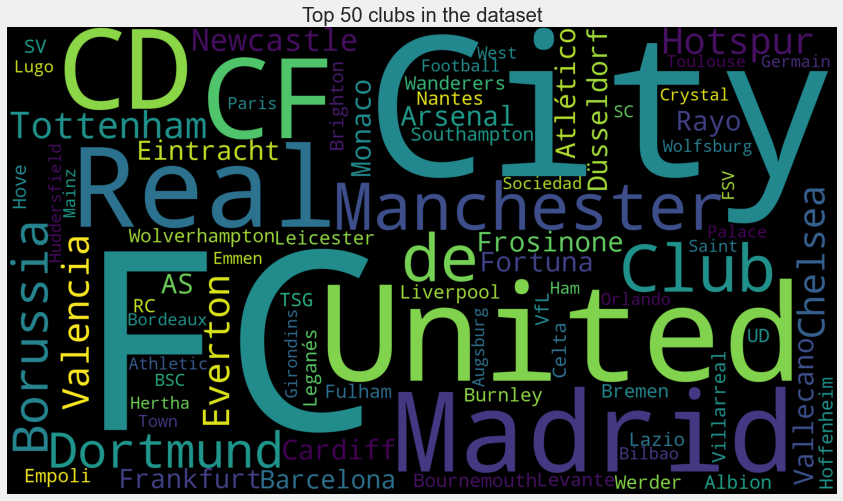

In [44]:
#Top 50 most mentioned clubs
plt.figure(figsize = (15,8))
plt.axis('off')
fifa1['count'] = 1
most_mentioned = fifa1.groupby('Club', as_index = False).count().sort_values(by = 'count', ascending = False)[['Club','count']]
wordcloud = WordCloud(height = 1080, width = 1920, background_color = 'black').generate(" ".join(most_mentioned['Club'][:50]))
plt.imshow(wordcloud)
plt.title('Top 50 clubs in the dataset')
plt.show()
#plt.savefig('mostmentioned.png')


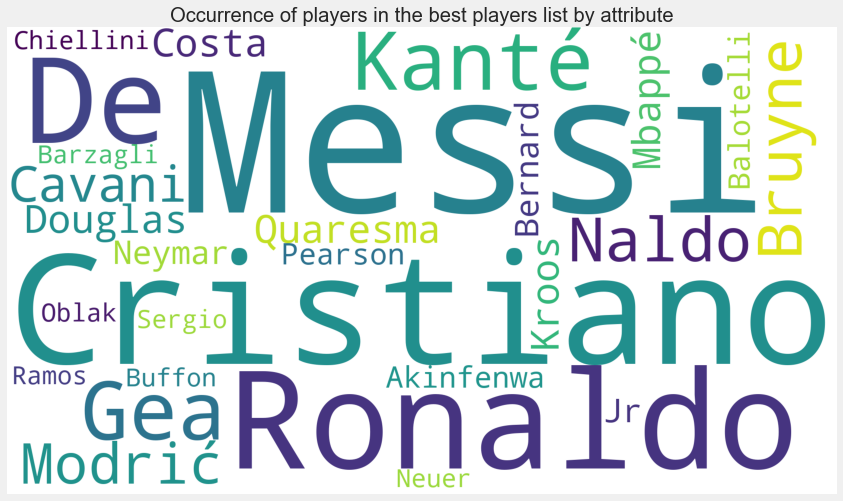

In [43]:
plt.figure(figsize = (15,8))
wordcloud = WordCloud(height = 1080, width = 1920, background_color = 'white').generate(" ".join(best_player_list))
plt.title('Occurrence of players in the best players list by attribute')
plt.axis('off')
plt.imshow(wordcloud)
plt.show()